In [1]:
import os
import sys

import numpy as np
import pandas as pd

OUT_DIR = "../sim_results"
SUB_DIR = "effects_of_homophily"
CURR_DIR = "sim_scripts"

# Load simulation source code
source_dir = "../src"
sys.path.insert(0, source_dir)
from simulations import run_simulation

In [4]:
.21/(1/5)

1.0499999999999998

In [127]:
np.arange(.1,.31,.01)

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ])

In [450]:
### SET SIMULATION PARAMETERS ###
num_days = 100
x = 0.5  # Initial proportion of ordinary people
prop_infected = 0.001  # Initial proportion of infected
rec_days = 5

# Fixed based on results from previous analyses
beta = 0.15
lambduh = 3  # beta_misinformed = lambda * beta_ord

# Homophily
alphas = np.arange(0.5, 1.01, 0.1)

# Result storage
totals = []  # Total infections
infection_flows = dict()  # Daily infections

betas = np.arange(.1,.41,.04)

# Run simulations
for beta in betas:
    for alpha in alphas:
        # Run the simulation based on the input
        S_o, S_m, I_o, I_m, R_o, R_m, r0s = run_simulation(
            frac_ord=x,
            prop_infec=prop_infected,
            num_days=num_days,
            beta_ord=beta,
            recovery_days=rec_days,
            beta_mult=lambduh,
            w_homophily=True,
            alpha=alpha,
            mixed=False,
        )

        total_ord_inf = max(R_o)
        total_mis_inf = max(R_m)

        infection_flows[(alpha, beta)] = I_o + I_m

        totals.append(
            {
                "alpha": alpha,
                "beta" : beta,
                "total_ord_inf": total_ord_inf,
                "total_mis_inf": total_mis_inf,
                "total": total_ord_inf + total_mis_inf,
            }
        )

### Total proportion of the network that gets infected ###
total_infected_df = pd.DataFrame(totals)

### Daily proportion of the network that gets infected ###
daily_infected_df = pd.DataFrame(infection_flows).reset_index()
daily_infected_df = daily_infected_df.rename(columns={"index": "day"})
daily_infected_df.day = daily_infected_df.day + 1
daily_infected_df = daily_infected_df.melt(id_vars="day")
daily_infected_df.rename(columns={"variable": "alpha"}, inplace=True)
daily_infected_df.rename(columns={"value": "prop_infected"}, inplace=True)

In [451]:
total_infected_df

,alpha,beta,total_ord_inf,total_mis_inf,total
0,0.5,0.10,4.315917e-03,0.013812,0.018128
1,0.6,0.10,6.596884e-03,0.025596,0.032193
2,0.7,0.10,1.129555e-02,0.056926,0.068222
3,0.8,0.10,1.802207e-02,0.127884,0.145906
4,0.9,0.10,1.767428e-02,0.219244,0.236918
5,1.0,0.10,3.075084e-17,0.289426,0.289426
6,0.5,0.14,1.127013e-01,0.268656,0.381357
7,0.6,0.14,1.161747e-01,0.308519,0.424694
8,0.7,0.14,1.101026e-01,0.340651,0.450754
9,0.8,0.14,9.351865e-02,0.367856,0.461375


In [441]:
total_infected_df = total_infected_df.rename(
    columns={
        "total_ord_inf" : "ordinary",
        "total_mis_inf" : "misinformed",
        "total" : "all",
    }
)

In [447]:
total_infected_df.head()

,alpha,beta,ordinary,misinformed,all
0,0.5,0.1,0.004316,0.013812,0.018128
1,0.6,0.1,0.006597,0.025596,0.032193
2,0.7,0.1,0.011296,0.056926,0.068222
3,0.8,0.1,0.018022,0.127884,0.145906
4,0.9,0.1,0.017674,0.219244,0.236918


In [414]:
source['beta'].unique()

array([0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27])

In [415]:
source['alpha'].unique()

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

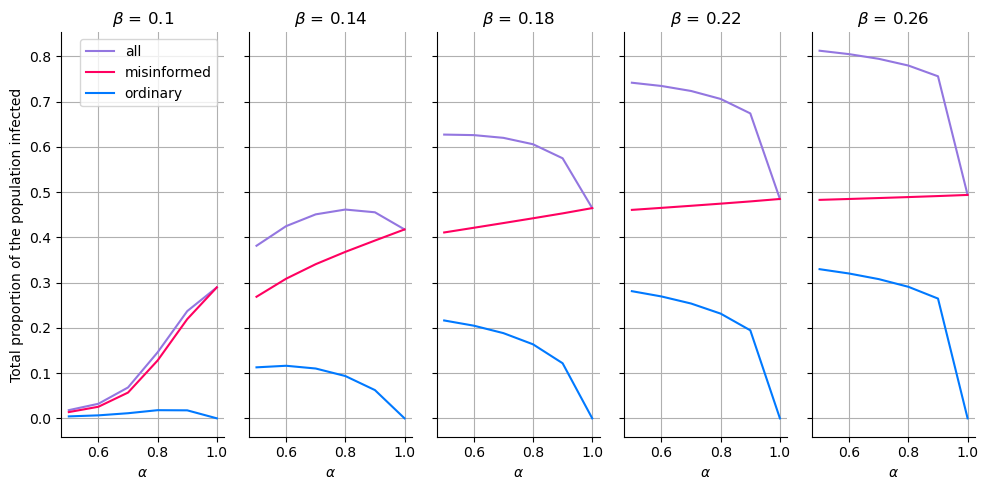

In [446]:
group_color_map = {
    "misinformed": "#FF0060",  # red
    "ordinary": "#0079FF",  # blue
    "all": "#9376E0",  # purple
}

source = total_infected_df[
    (total_infected_df['beta'] < .27) & \
    (total_infected_df['alpha'] < 1)
]

betas = source['beta'].unique()
alphas = source['alpha'].unique()

rows = len(alphas)
cols = len(betas)

# fig, ax = plt.subplots(nrows=cols,
#                        figsize=(5,10))

fig, ax = plt.subplots(ncols=cols,
                       figsize=(10,5),
                       sharey=True
                      )

for col, beta in enumerate(betas):
    temp_df = source[(source['beta'] == beta)]
    
    ax[col].plot(
        temp_df['alpha'],
        temp_df['all'],
        label = "all",
        color = group_color_map["all"]
    )
    ax[col].plot(
        temp_df['alpha'],
        temp_df['misinformed'],
        label = "misinformed",
        color = group_color_map["misinformed"]
    )
    ax[col].plot(
        temp_df['alpha'],
        temp_df['ordinary'],
        label = "ordinary",
        color = group_color_map["ordinary"]
    )
    ax[col].set_xlabel(r"$\alpha$")
    
    ax[col].set_title(r'$\beta$ = '+f'{np.round(beta,2)}')

    ax[col].grid()
    ax[col].spines['top'].set_visible(False)
    ax[col].spines['right'].set_visible(False)

    
ax[0].set_ylabel("Total proportion of the population infected")

ax[0].legend()

plt.tight_layout()